In [2]:
# loading needed methods
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

from scipy.fft import fft,dst
from random import seed,sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc,\
precision_score
import tensorflow.keras as keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler



In [3]:
dataset = pd.read_csv('../input/Fraud/Fourier/Xdct.csv') # unchanged dataset1

In [4]:
dataset.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,isFraud
0,0,164.625194,86.483731,30.342710,56.641429,1.352690e+02,133.285984,2.255428e+01,113.097221,1.939625e+01,8.784747e+01,46.046120,1
1,1,12937.851796,2251.950586,11320.061661,2171.054501,2.298371e+03,6262.750496,9.928375e+03,15154.229502,7.220100e+03,1.318720e+04,1021.658848,1
2,2,210325.515876,26618.914212,67934.823322,168368.324313,1.045304e+04,168808.916008,1.884085e+04,72785.524578,1.384916e+05,4.462360e+04,34256.102953,0
3,3,208279.182502,5846.957706,66970.922707,187972.670282,3.775151e+04,159579.829275,3.428939e+04,92859.748498,1.684495e+05,2.118052e+04,26243.843419,0
4,4,285710.543066,642548.975294,756597.819911,883585.907603,1.861015e+06,88073.783888,2.236956e+06,757810.364395,1.095783e+06,1.095137e+06,224646.723809,0


In [5]:
dataset = dataset.drop('Unnamed: 0', axis=1)

In [6]:
X = dataset.drop("isFraud",1)
y = dataset.isFraud

In [7]:
def getCosine(v1,v2):
    rad = np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))
    return math.cos(rad)

In [9]:
from imblearn.under_sampling import NearMiss
from collections import Counter
nm1 = NearMiss(version=1)
X_resampled_nm1, y_resampled = nm1.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))


[(0, 8213), (1, 8213)]


In [18]:
import math

In [10]:
def cal_alpha(X):
    sum_cos = 0
    map_ang = []
    for t1 in X:
        ang = 0
        for t2 in X:
            cos = getCosine(t1,t2)
            ang = ang + cos
            
        map_ang.append(ang/len(X))
        sum_cos = sum_cos + ang/len(X)
            
    alpha = sum_cos/len(X)
    
    return alpha,map_ang

In [12]:
RandomState = 42
seed(21)

X_train, X_test, y_train, y_test = train_test_split(X_resampled_nm1, y_resampled, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_0 = X_train[y_train==0]
y_0 = y_train[y_train==0]

In [20]:
a,b=cal_alpha(np.array(X_0))

In [26]:
len(np.array(b))

6564

In [25]:
a

0.5414602081748378

In [28]:
xis=len(b)
xi=np.arange(0,xis,1)

In [29]:
len(xi)==len(b)

True

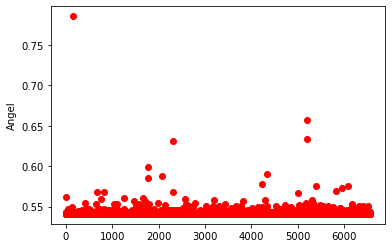

In [30]:
plt.plot(xi,b,'ro')
plt.ylabel('Angel')
plt.show()

In [35]:
len(X_test[y_test==0])

1649

In [42]:
def fit(X_test,X_train,y_train,alpha):
    y=[]
    for t in X_test:
        y.append(dct_eval(X_train,t,alpha))
    return y

In [53]:
def dct_eval(X_train,X,alpha):
    cos=0
    for T in X_train:
        cos = cos + getCosine(X,T)
    avg = cos/len(X_train)
    if avg < alpha:
        return 0
    else:
        return 1

In [56]:
y_pred = fit(X_test,X_0,y_train,a)

In [47]:
def rel(y_test,y_pred):
    predictionsRFR=np.array(y_pred,dtype='int') 
    CM_RFR = confusion_matrix(y_test,predictionsRFR)
    CR_RFR = classification_report(y_test,predictionsRFR)
    fprRFR, recallRFR, thresholdsRFR = roc_curve(y_test, predictionsRFR)
    AUC_RFR = auc(fprRFR, recallRFR)
    print("=============<>==================\n")
    resultsRFR = {"Confusion Matrix":CM_RFR,"Classification Report":CR_RFR,"Area Under Curve":AUC_RFR}
    for measure in resultsRFR:
        print(measure,": \n",resultsRFR[measure])
    print("=============<>==================\n")

In [57]:
rel(y_test,y_pred)

=============<>==================

Confusion Matrix : 
 [[1446  203]
 [ 157 1480]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1649
           1       0.88      0.90      0.89      1637

    accuracy                           0.89      3286
   macro avg       0.89      0.89      0.89      3286
weighted avg       0.89      0.89      0.89      3286

Area Under Curve : 
 0.8904939703557774
=============<>==================



In [49]:
X_1 = X_train[y_train==1]
y_1 = y_train[y_train==1]

In [50]:
a1,b1=cal_alpha(np.array(X_1))

In [51]:
xys=len(b1)
xi1=np.arange(0,xys,1)

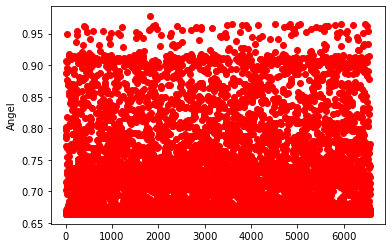

In [52]:
plt.plot(xi1,b1,'ro')
plt.ylabel('Angel')
plt.show()